In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

matplotlib.rcParams['figure.dpi'] = 300

In [24]:
dfmod = pd.read_csv("../Epistasis/model_coefs/ACE2_5order_biochem.txt", skiprows=[0,1,3], sep="\t")
    
with open("../Epistasis/model_coefs/ACE2_5order_biochem.txt") as f:
    f.readline()
    f.readline()
    f.readline()
    intcpt = float(f.readline().split("\t")[1])

In [25]:
df = pd.read_csv("../../Titeseq/results/Kds/cleaned_Kds_RBD_ACE2.tsv",
                 dtype={"geno":"str"}, sep="\t")

dct_lin = dfmod[dfmod.Term.str.count(",") == 0].Coefficient.to_dict() 

df["$\log_{10}(K_D)$ (linear model estimation)"] = df.geno.apply(
lambda x: sum([dct_lin[i] for i in dct_lin if x[i] == '1']) + intcpt
)

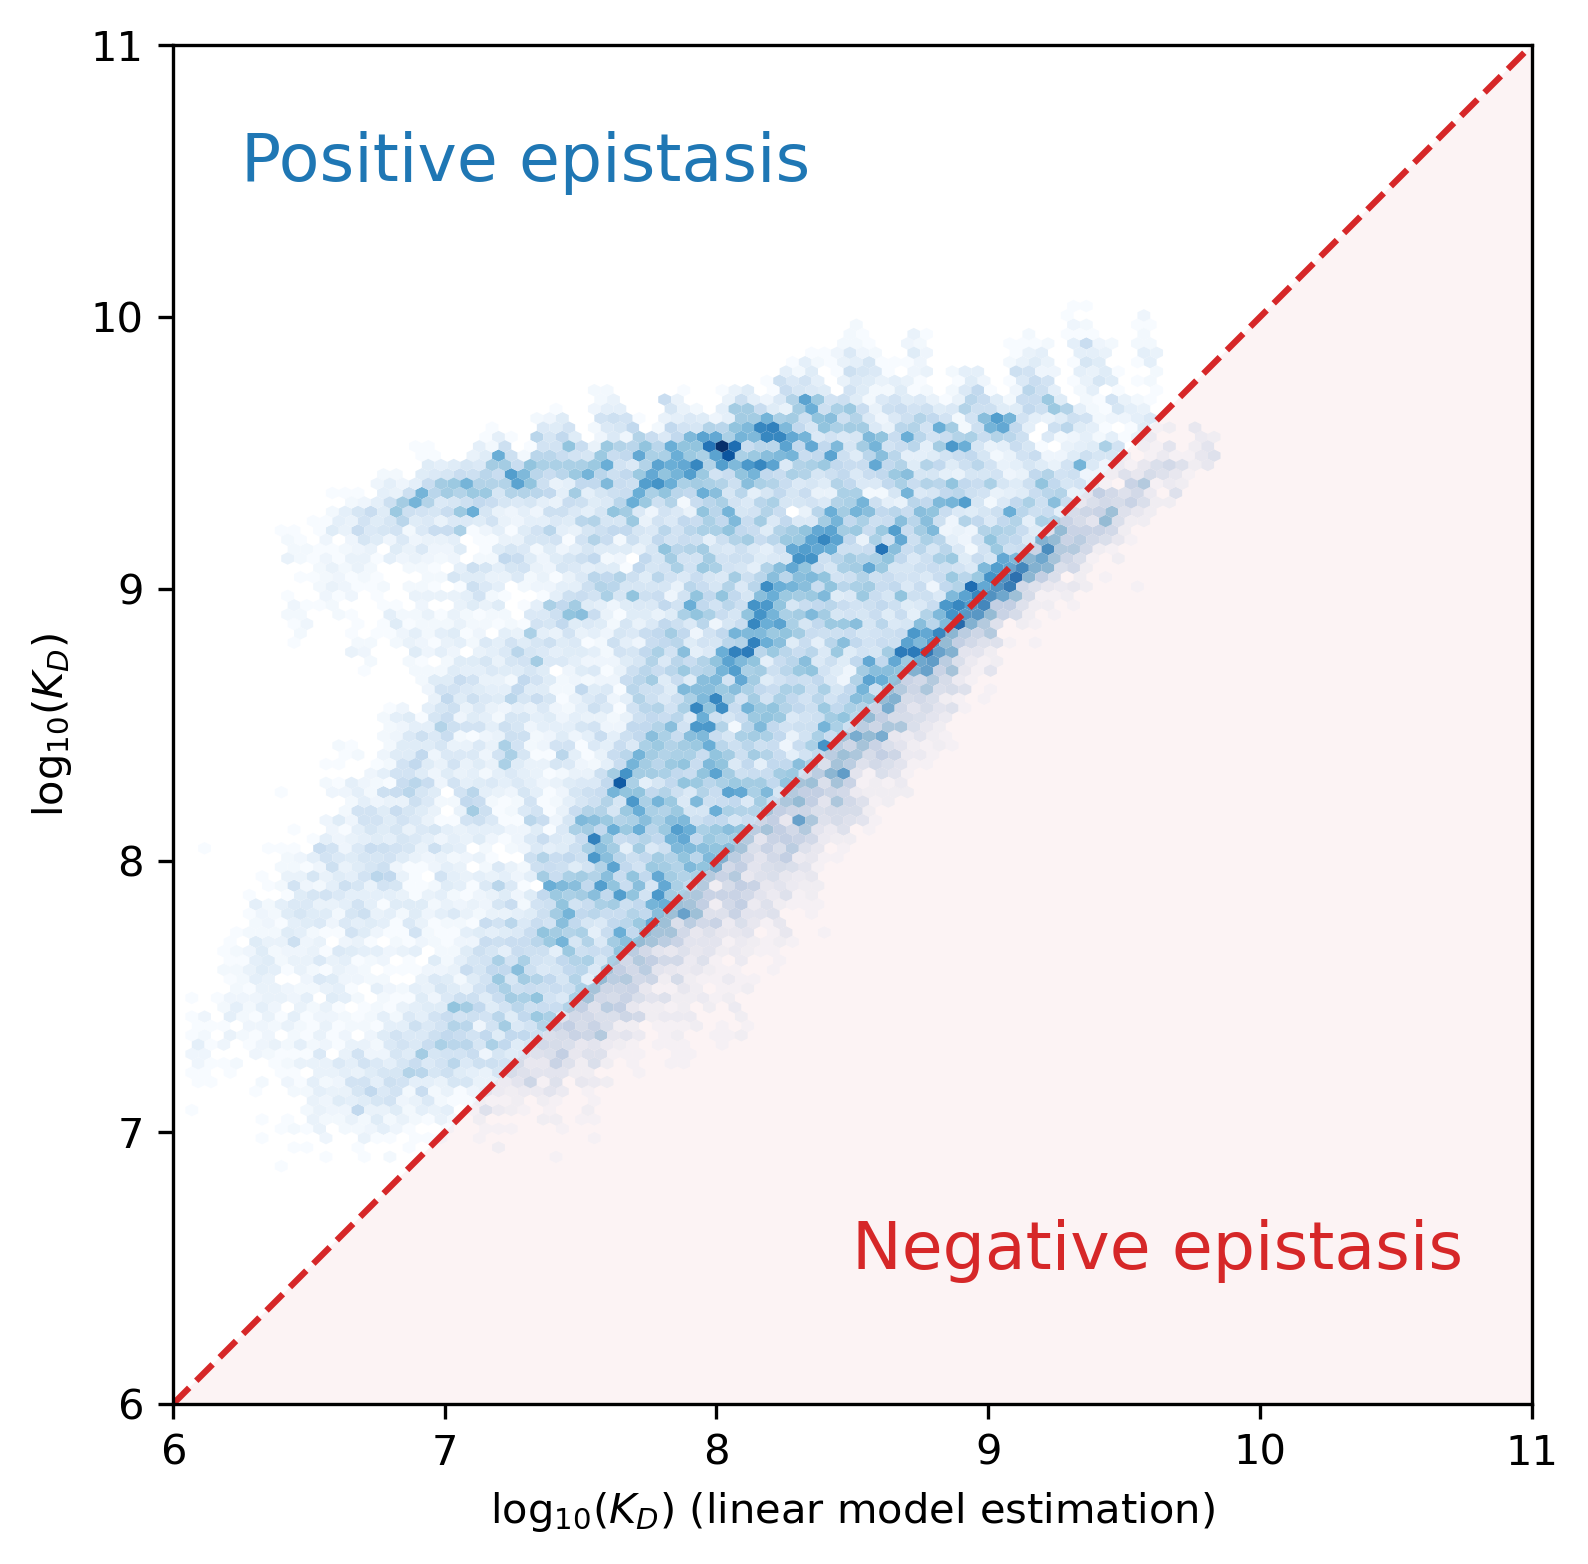

In [36]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(6, 6))
plot = plt.hexbin(x=df["$\log_{10}(K_D)$ (linear model estimation)"], 
                  y=df["log10Kd"], cmap="Blues", linewidth=0,
                  mincnt=1, gridsize=80)

ax.plot([6, 11], [6, 11], '--', color=sns.color_palette()[3])
ax.fill([6, 11, 11], [6, 11, 6], alpha=0.05, color=sns.color_palette()[3], edgecolor=None)

ax.set_xlabel("$\log_{10}(K_D)$ (linear model estimation)")
ax.set_ylabel("$\log_{10}(K_D)$")
ax.set_aspect('equal', adjustable='box')
#plot.ax_joint.fill([6, 6, 11], [6, 11, 11], alpha=0.1, color=sns.color_palette()[2], edgecolor=None)
ax.text(8.5, 6.5, "Negative epistasis", color=sns.color_palette()[3], fontsize=16)
ax.text(6.25, 10.5, "Positive epistasis", color=sns.color_palette()[0], fontsize=16)
ax.set_xlim(6, 11)
ax.set_ylim(6, 11)

plt.savefig("../Figures/SI_PosNeg_epistasis.png")